In [ ]:
import torch
import os 
os.environ['ROOT_DIR_BRAINTREEBANK'] = '/om2/user/zaho/braintreebank/braintreebank/'

import neuroprobe.config as neuroprobe_config
from neuroprobe.braintreebank_subject import BrainTreebankSubject
from neuroprobe.datasets import BrainTreebankSubjectTrialBenchmarkDataset
import numpy as np

task_correlations = np.zeros((len(neuroprobe_config.NEUROPROBE_LITE_SUBJECT_TRIALS), len(neuroprobe_config.NEUROPROBE_TASKS), len(neuroprobe_config.NEUROPROBE_TASKS)))

coverage_dict = {}
for st_i, (subject_id, trial_id) in enumerate(neuroprobe_config.NEUROPROBE_LITE_SUBJECT_TRIALS):
    subject = BrainTreebankSubject(subject_id, allow_corrupted=False, cache=False, dtype=torch.float32)
    subject.load_neural_data(trial_id)
    
    task_data = {}
    for task_i, task in enumerate(neuroprobe_config.NEUROPROBE_TASKS):
        dataset = BrainTreebankSubjectTrialBenchmarkDataset(subject, trial_id, torch.float32, task, output_indices=True, lite=True)
        indices_from = []
        labels = []
        for datapoint_i, ((neural_index_from, neural_index_to), label) in enumerate(dataset):
            if neural_index_from in indices_from:
                print(f"Subject {subject_id} trial {trial_id} task {task} has duplicate index: {neural_index_from}")
                continue
            indices_from.append(neural_index_from)
            labels.append(label)
        task_data[task] = {
            "indices_from": indices_from,
            "labels": labels
        }
        print("Completed task", task, "for subject", subject_id, "trial", trial_id)


    for task_a_i, task_a in enumerate(neuroprobe_config.NEUROPROBE_TASKS):
        for task_b_i, task_b in enumerate(neuroprobe_config.NEUROPROBE_TASKS):

            labels_a = []
            labels_b = []
            for index_from_a in task_data[task_a]["indices_from"]:
                if index_from_a in task_data[task_b]["indices_from"]:
                    labels_a.append(task_data[task_a]["labels"][ task_data[task_a]["indices_from"].index(index_from_a)])
                    labels_b.append(task_data[task_b]["labels"][ task_data[task_b]["indices_from"].index(index_from_a)])
            
            if len(labels_a) == 0:
                task_correlations[st_i, task_a_i, task_b_i] = np.nan
                continue

            task_correlations[st_i, task_a_i, task_b_i] = np.corrcoef(labels_a, labels_b)[0,1]
            

print(task_correlations)

Completed task frame_brightness for subject 1 trial 1
Completed task global_flow for subject 1 trial 1
Completed task local_flow for subject 1 trial 1
Completed task global_flow_angle for subject 1 trial 1
Completed task local_flow_angle for subject 1 trial 1
Completed task face_num for subject 1 trial 1
Completed task volume for subject 1 trial 1
Completed task pitch for subject 1 trial 1
Completed task delta_volume for subject 1 trial 1
Completed task delta_pitch for subject 1 trial 1
Completed task speech for subject 1 trial 1
Completed task onset for subject 1 trial 1
Completed task gpt2_surprisal for subject 1 trial 1
Completed task word_length for subject 1 trial 1
Completed task word_gap for subject 1 trial 1
Completed task word_index for subject 1 trial 1
Completed task word_head_pos for subject 1 trial 1
Completed task word_part_speech for subject 1 trial 1
Completed task speaker for subject 1 trial 1


/net/vast-storage/scratch/vast/yanglab/zaho/bfm/.venv/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/net/vast-storage/scratch/vast/yanglab/zaho/bfm/.venv/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


/tmp/ipykernel_2427293/2373445171.py:2: RuntimeWarning: Mean of empty slice
  mean_task_correlations = np.nanmean(task_correlations, axis=0)


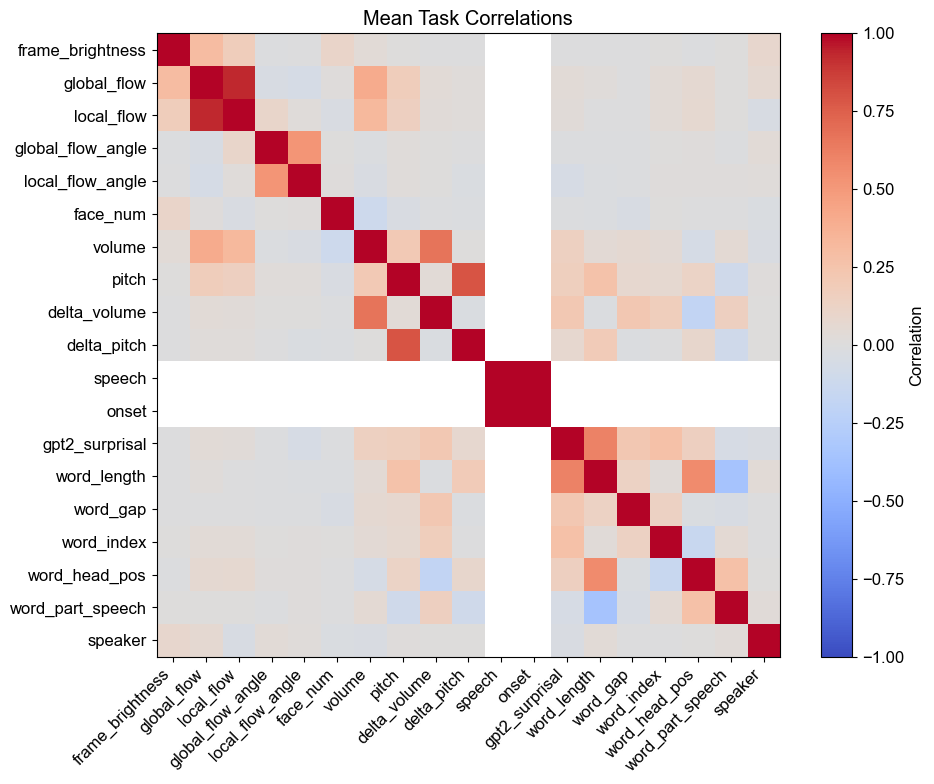

In [6]:
task_correlations # shape (len(neuroprobe_config.NEUROPROBE_LITE_SUBJECT_TRIALS), len(neuroprobe_config.NEUROPROBE_TASKS), len(neuroprobe_config.NEUROPROBE_TASKS)))
mean_task_correlations = np.nanmean(task_correlations, axis=0)


import matplotlib.pyplot as plt
# Add Arial font
import matplotlib.font_manager as fm
font_path = 'assets/font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 12})


plt.figure(figsize=(10, 8))
plt.imshow(mean_task_correlations, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

# Add task names as labels
plt.xticks(range(len(neuroprobe_config.NEUROPROBE_TASKS)), neuroprobe_config.NEUROPROBE_TASKS, rotation=45, ha='right')
plt.yticks(range(len(neuroprobe_config.NEUROPROBE_TASKS)), neuroprobe_config.NEUROPROBE_TASKS)

plt.title('Mean Task Correlations')
plt.tight_layout()
plt.show()

In [10]:
mean_task_correlations = np.nanmean(task_correlations, axis=0)
# Get upper triangle elements using a mask (excluding diagonal)
mask = np.triu(np.ones_like(mean_task_correlations, dtype=bool), k=1)
off_diag_correlations = np.abs(mean_task_correlations[mask])
# Calculate mean and SEM of off-diagonal elements
mean_off_diag = np.nanmean(off_diag_correlations)
sem_off_diag = np.nanstd(off_diag_correlations) / np.sqrt(np.sum(~np.isnan(off_diag_correlations)))

print(f"Mean absolute off-diagonal correlation: {mean_off_diag:.3f} ± {sem_off_diag:.3f}")

Mean absolute off-diagonal correlation: 0.094 ± 0.014


/tmp/ipykernel_3626458/1330512443.py:1: RuntimeWarning: Mean of empty slice
  mean_task_correlations = np.nanmean(task_correlations, axis=0)


In [3]:
import numpy as np

btbank71_indices = np.array(coverage_dict['btbank7_1']['tasks']['speaker']) / 2048
btbank71_indices_diff = btbank71_indices[1:] - btbank71_indices[:-1]

# Get indices of top 10 values
top_10_indices = np.argsort(btbank71_indices_diff)[-10:][::-1]
top_10_values = btbank71_indices_diff[top_10_indices]

# Print top 10 values and their indices
print("For btbank7_1, the gaps in the task coverage are:")
for idx, val in zip(top_10_indices, top_10_values):
    print(f"A gap of {val:.2f}s, which starts at {btbank71_indices[idx]:.2f}s and ends at {btbank71_indices[idx+1]:.2f}s in the recording session")

For btbank7_1, the gaps in the task coverage are:
A gap of 355.06s, which starts at 3373.55s and ends at 3728.61s in the recording session
A gap of 281.33s, which starts at 2485.52s and ends at 2766.85s in the recording session
A gap of 53.02s, which starts at 1815.14s and ends at 1868.17s in the recording session
A gap of 38.63s, which starts at 2071.50s and ends at 2110.14s in the recording session
A gap of 35.41s, which starts at 568.23s and ends at 603.64s in the recording session
A gap of 32.81s, which starts at 1643.66s and ends at 1676.47s in the recording session
A gap of 28.93s, which starts at 1676.93s and ends at 1705.87s in the recording session
A gap of 26.19s, which starts at 1554.05s and ends at 1580.25s in the recording session
A gap of 23.67s, which starts at 1271.68s and ends at 1295.35s in the recording session
A gap of 22.36s, which starts at 1350.68s and ends at 1373.04s in the recording session


In [4]:
gap_sessions = {
    10: [ # btbank10
        {
            "trial_id": 1,
            "start_time": 0.0,
            "end_time": 930.0,
            
            "new_trial_id": 100,
        },
        {
            "trial_id": 0,
            "start_time": 5350.0,
            "end_time": 5645.0,
            
            "new_trial_id": 101,
        }
    ],
    7: [ # btbank7
        {
            "trial_id": 1,
            "start_time": 0.0,
            "end_time": 395.0,
            
            "new_trial_id": 100,
        },
        {
            "trial_id": 1,
            "start_time": 2490.0,
            "end_time": 2760.0,
            
            "new_trial_id": 101,
        },
        {
            "trial_id": 1,
            "start_time": 3380.0,
            "end_time": 3725.0,
            
            "new_trial_id": 102,
        }
    ]
}

In [5]:
import h5py, os

sampling_rate = 2048

for subject_id in gap_sessions:
    for new_session in gap_sessions[subject_id]:

        original_session_h5_filename = neuroprobe_config.ROOT_DIR + f"sub_{subject_id}_trial{new_session['trial_id']:03d}.h5"
        new_session_h5_filename = "data/analyses/task_coverage_of_sessions/" + f"sub_{subject_id}_trial{new_session['new_trial_id']:03d}.h5"
        os.makedirs(os.path.dirname(new_session_h5_filename), exist_ok=True)

        from_index = int(new_session['start_time'] * sampling_rate)
        to_index = int(new_session['end_time'] * sampling_rate)
        # Read data from original file and write selected portion to new file with compression
        with h5py.File(original_session_h5_filename, 'r') as f_in, h5py.File(new_session_h5_filename, 'w') as f_out:
            # Create data group in output file
            data_group = f_out.create_group('data')
            
            # Copy each electrode's data for the specified time window with compression
            for electrode in f_in['data'].keys():
                electrode_data = f_in['data'][electrode][from_index:to_index]
                data_group.create_dataset(electrode, data=electrode_data, compression="gzip", compression_opts=9)
            
        print(f"Created {new_session_h5_filename} with data indices from {from_index} to {to_index} from file {original_session_h5_filename}")


Created data/analyses/task_coverage_of_sessions/sub_10_trial100.h5 with data indices from 0 to 1904640 from file /om2/user/zaho/braintreebank/braintreebank/sub_10_trial001.h5
Created data/analyses/task_coverage_of_sessions/sub_10_trial101.h5 with data indices from 10956800 to 11560960 from file /om2/user/zaho/braintreebank/braintreebank/sub_10_trial000.h5
Created data/analyses/task_coverage_of_sessions/sub_7_trial100.h5 with data indices from 0 to 808960 from file /om2/user/zaho/braintreebank/braintreebank/sub_7_trial001.h5
Created data/analyses/task_coverage_of_sessions/sub_7_trial101.h5 with data indices from 5099520 to 5652480 from file /om2/user/zaho/braintreebank/braintreebank/sub_7_trial001.h5
Created data/analyses/task_coverage_of_sessions/sub_7_trial102.h5 with data indices from 6922240 to 7628800 from file /om2/user/zaho/braintreebank/braintreebank/sub_7_trial001.h5
